# Estudos simples de teste A/B

## 1. Imports

In [32]:
import numpy   as np
import pandas  as pd
import seaborn as sns
from   IPython.display import Image

from scipy.stats                 import ttest_1samp, shapiro, ttest_ind, mannwhitneyu, kruskal, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1- Primeiro Problema (One-Sample T-test)

    Análise de eficiência de adubação quanto a altura média de plantas (préviamente conhecida '15 cm') em pequeno conjunto de dados para melhor compreenção do One_Sample T-test
    - H0 = A altura média das plantas não é afetada pela adição do adubo

## 1. Data

In [3]:
df = [14,14,16,13,12,17,15,14,15,13,15,14]

## 2. Seleçãod o modelo

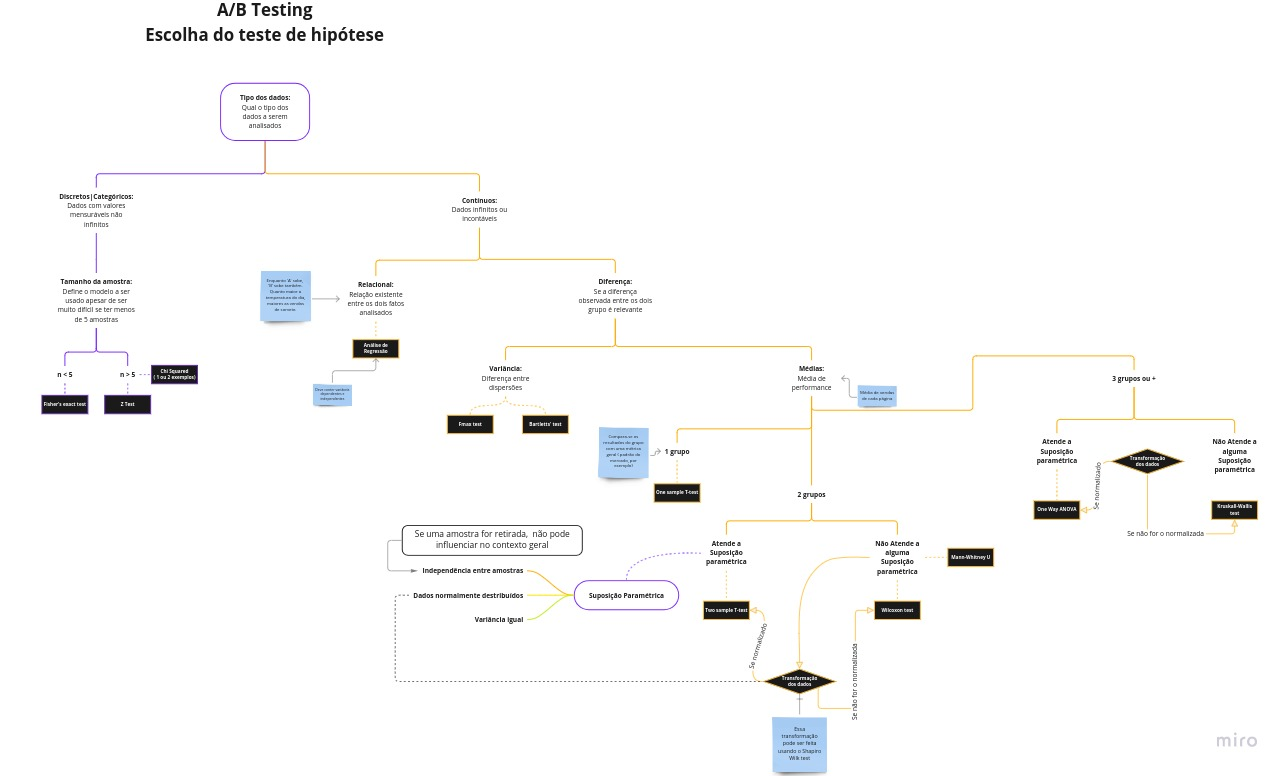

In [4]:
Image( '../img/AB_select_model.jpg' )

In [5]:
print( '-Tipo de dados: Contínuo' )
print( '-Análise a ser feita: Diferença' )
print( '-Tipo de diferença: Médias' )
print( '-Qauntidade de grupos: 1' )
print( '--- Teste Inferência: One-Sample T-test---' )

-Tipo de dados: Contínuo
-Análise a ser feita: Diferença
-Tipo de diferença: Médias
-Qauntidade de grupos: 1
--- Teste Inferência: One-Sample T-test---


## 3. Aplicando One-Sample T-test

In [6]:
stat, pvalue = ttest_1samp( df, popmean = 15 )
print( f'P-valor: {pvalue}' )

P-valor: 0.12014460742498101


In [7]:
### Set do nível de significância ( α ) em 5%
alpha = 0.05
if pvalue < alpha:
    print( 'Hipótese nula rejeitada' )
else:
    print( 'Falha ao rejeitar hipótese nula' )    

Falha ao rejeitar hipótese nula


    Como o p-valor é menor do que nosso nível de significância, indica que não temos amostras o suficiente para rejeitar a hipótese nula. O que não quer dizer que seja falsa ou verdadeira, apenas que não podemos valida-la ou invalida-la.

# 2- Segundo Problema (Two-Sample T-test)  _-Condições paramétricas satisfeitas-_ 

    No segundo problema, também de maneira bem simplificada, temos uma pesquisa contendo dados referentes a altura de duas espécies diferentes. Com este estudo, buscamos saber se ambas as plantas possuem a mesma altura média escolhendo aleatoriamente dados de 20 plantas de cada canteiro ou se o adubo aplicado no canteiro da segunda amostra acelerou o crescimento das plantas. Sendo que:
    - H0 = Os grupos possuem médias de altura iguais;
    - H1 = Os grupos possuem médias de altrua diferentes.

## 1. Data

In [8]:
am1 = np.array( [14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12] )
am2 = np.array( [15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13] )

## 2. Seleção do modelo

In [9]:
print( '-Tipo de dados: Contínuo' )
print( '-Análise a ser feita: Diferença' )
print( '-Tipo de diferença: Médias' )
print( '-Qauntidade de grupos: 2' )
print( '-Atende as suposições paramétricas: SIM' )
print( '--- Teste Inferência: Two-Sample T-test---' )

-Tipo de dados: Contínuo
-Análise a ser feita: Diferença
-Tipo de diferença: Médias
-Qauntidade de grupos: 2
-Atende as suposições paramétricas: SIM
--- Teste Inferência: Two-Sample T-test---


### 2.1 Suposição paramétrica

#### 2.1.1 Independência entre as amostras:

    Os grupos se mostram independentes pois, a exclusão ou alteração de um elemento de um grupo não interfere nos elementos do outro.

### 2.1.2- Dados normalmente distribuídos:

    Em um teste Shapiro para definir a normalidade da distribuição da amostra, por ser também um teste A/B, levantamos duas hipóteses:
    - H0 = Distribuição normal;
    - H1 Distribuição não normal.
    
    * Lembrando que se deve considedrar como H0 a distribuição normal pois, caso contrário o teste não se provaria relevante pois apenas descartaria a distribuição normal podendo ser qualquer outra distribuição. E também tem-se que levar em consideração que Gauss afirma em seus estudos que toda amostragem de uma distribuição mesmo que não seja normal, retorna uma distribuição que tende a normal.

In [10]:
## Set do valor de significância
alpha = 0.05

stats, pvalue = shapiro( am1 )
if pvalue > alpha:
    print( 'Distribuição da primeira amostra é normal' )
else:
    print( 'Distribuição da primeira amostra não é normal' )    

stats, pvalue = shapiro( am2 )
if pvalue > alpha:
    print( 'Distribuição da segunda amostra é normal' )
else:
    print( 'Distribuição da segunda amostra não é normal' )     

Distribuição da primeira amostra é normal
Distribuição da segunda amostra é normal


### 2.1.3- Variância igual entre amostras:


    Se a divisão da maior variância pela menor, retornar valor menor do que 4, pode-se constatar que são iguais.

    * OBS: Essa fórmula e o valor referência, foi encontrada em estudos mas não sei precisar o motivo e o desenvolvimento do estudo que levou a esta regra.

In [11]:
print( f'Variancia do primeiro grupo: {np.var( am1 ):.3}' )
print( f'Variancia do segundo grupo: {np.var( am2 ):.3}' )
if np.var( am2 ) > np.var( am1 ):
    if( np.var( am2 ) / np.var( am1 ) < 4 ):
        print( 'Variâncias dentro do range de igualdade.' )
    else:
        print( 'Variâncias fora do range de igualdade.' )    
else :
    if( np.var( am1 ) / np.var( am2 ) < 4 ):
        print( 'Variâncias dentro do range de igualdade.' )
    else:
        print( 'Variâncias fora do range de igualdade.' )   

Variancia do primeiro grupo: 7.73
Variancia do segundo grupo: 12.3
Variâncias dentro do range de igualdade.


## 3. Aplicação do modelo

    Como a suposição paramétrica foi satisfeita, usaremos o modelo Two sample T-test (que vem da biblioteca com o nome: ttest_ind) 

In [12]:
### Quando se seta o valor de equal_var como True, ele consegue realizar o teste com precisão mesmo se os grupos não tiverem uma variância igual
stats, pvalue = ttest_ind( am1, am2, equal_var = True )

##Setando o valor de alpha
alpha = 0.05

if pvalue < alpha:
    print( 'Hipótese nula rejeitada (H0).' )
else:
    print( 'Falha em rejeitar hipótese nula (H0).' )    

Falha em rejeitar hipótese nula (H0).


    Saindo do 'Estatistiquês' e resumindo em português:
    - Com o número de amostras coletadas, não foi possível afirmar que o adubo OCASIONOU ou NÃO OCASIONOU um maior crescimento nas plantas. O que é comum em amostras pequenas como esta.
    - Só seria possível chegar 'estatisticamente a uma conclusão', caso a diferença entre os resultados das amostras dos grupos fosse extremamente gritantes.

# 3- Segundo problema Problema (Mann-Whitney T-test)  _-Condições paramétricas não satisfeitas-_ 

    Seguindo o mesmo enunciado do problema anterior, podemos estatisticamente dizer que há diferença fortemente relacionada ao adubo usado nos diferentes grupos? 
    - H0 = Os grupos possuem médias de altura iguais;
    - H1 = Os grupos possuem médias de altrua diferentes.    

## 1. Data


In [13]:
am1 = [20, 23, 21, 20, 18, 17, 18, 14, 20, 24, 43, 19]
am2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

In [14]:
### Cálculo de médias de amostras
print(np.mean(am1))
print(np.mean(am2))

21.416666666666668
22.75


## 2. Seleção do modelo

In [15]:
print( '-Tipo de dados: Contínuo' )
print( '-Análise a ser feita: Diferença' )
print( '-Tipo de diferença: Médias' )
print( '-Qauntidade de grupos: 2' )
print( '-Atende as suposições paramétricas: Não' )
print( '--- Teste Inferência: Mann-Whitney T-test' )

-Tipo de dados: Contínuo
-Análise a ser feita: Diferença
-Tipo de diferença: Médias
-Qauntidade de grupos: 2
-Atende as suposições paramétricas: Não
--- Teste Inferência: Mann-Whitney T-test


### 2.1 Suposição paramétrica

#### 2.1.1 Independência entre as amostras:

    Os grupos se mostram independentes pois, a exclusão ou alteração de um elemento de um grupo não interfere nos elementos do outro.

### 2.1.2- Dados normalmente distribuídos:

    Em um teste Shapiro para definir a normalidade da distribuição da amostra, por ser também um teste A/B, levantamos duas hipóteses:
    - H0 = Distribuição normal;
    - H1 = Distribuição não normal.
    
    * Lembrando que se deve considedrar como H0 a distribuição normal pois, caso contrário o teste não se provaria relevante pois apenas descartaria a distribuição normal podendo ser qualquer outra distribuição. E também tem-se que levar em consideração que Gauss afirma em seus estudos que toda amostragem de uma distribuição mesmo que não seja normal, retorna uma distribuição que tende a normal.

In [16]:
## Set do valor de significância
alpha = 0.05

stats, pvalue = shapiro( am1 )
if pvalue > alpha:
    print( 'Distribuição da primeira amostra é normal' )
else:
    print( 'Distribuição da primeira amostra não é normal' )    
print( pvalue )
stats, pvalue = shapiro( am2 )
if pvalue > alpha:
    print( 'Distribuição da segunda amostra é normal' )
else:
    print( 'Distribuição da segunda amostra não é normal' )    
print( pvalue )    

Distribuição da primeira amostra não é normal
0.0005459139938466251
Distribuição da segunda amostra é normal
0.9021514058113098


### 2.1.3- Variância igual entre amostras:


    Se a divisão da maior variância pela menor, retornar valor menor do que 4, pode-se constatar que são iguais.

    * OBS: Essa fórmula e o valor referência, foi encontrada em estudos mas não sei precisar o motivo e o desenvolvimento do estudo que levou a esta regra.

In [17]:
print( f'Variancia do primeiro grupo: {np.var( am1 ):.3}' )
print( f'Variancia do segundo grupo: {np.var( am2 ):.3}' )
if np.var( am2 ) > np.var( am1 ):
    if( np.var( am2 ) / np.var( am1 ) < 4 ):
        print( 'Variâncias dentro do range de igualdade.' )
    else:
        print( 'Variâncias fora do range de igualdade.' )    
else :
    if( np.var( am1 ) / np.var( am2 ) < 4 ):
        print( 'Variâncias dentro do range de igualdade.' )
    else:
        print( 'Variâncias fora do range de igualdade.' )   

Variancia do primeiro grupo: 48.7
Variancia do segundo grupo: 9.69
Variâncias fora do range de igualdade.


## 3. Aplicação do modelo

In [18]:
### Ao se perceper a não conformidade com as suposições paramétricas, aplica-se então o modelo Mann-Whitney praticamente da mesma forma em que se utiliza o modelo Two-sample (T-testind)
stats, pvalue = mannwhitneyu( am1, am2 ) 

##Setando o valor de alpha
alpha = 0.05

if pvalue < alpha:
    print( 'Hipótese nula rejeitada (H0).' )
else:
    print( 'Falha em rejeitar hipótese nula (H0).' )  

print( pvalue )

Falha em rejeitar hipótese nula (H0).
0.07217495133598324


# 4- Terceiro Problema (Kruskall-Wallis test)

am1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
am2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
am3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

    Constatação de eficácia em 4 grupos submetidos a diferentes tipos de tratamento
    - Grupo 1: Não rececbeu nenhum tipo de tratamento
    - Grupo 2: Recebeu tratamento tipo 1
    - Grupo 3: Recebeu tratamento tipo 2
    - Grupo 4: Recebeu tratamento tipo 3

    H0 = Não há diferença na média das amostras.
    H1 = Há diferença na média das amostras.

## 1. Data

In [19]:
df = pd.DataFrame(
    {
        'A' : [25, 30, 28, 36, 29],
        'B' : [45, 55, 29, 56, 40],
        'C' : [30, 29, 33, 37, 27],
        'D' : [54, 60, 51, 62, 73]
    }
)
display( df )
df_melt = pd.melt( df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'], var_name = 'treatment' )
display( df_melt.head(6) )

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


,index,treatment,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45


## 2. Seleção do modelo

    - Tipo de dados: Contínuo
    - Análise a ser feita: Diferença
    - Tipo de diferença: Médias
    - Qauntidade de grupos: 3+
    - Atende as suposições paramétricas: NÃO
    - - Teste Inferência: Kruskall-Wallis test

### 2.1 Suposição paramétrica

In [20]:
###--- Existe independência entre as amostras? 
# !SIM!
print( '-- Primeira regra atendida' )

###--- Os dados são normalmente distribuídos?
#(Função desenvolvida apenas para aprofundar os conhecimentos nos conceitos do shapiro e fundamentos da programação)
alpha = 0.05

grupos = ['A', 'B', 'C', 'D']
cont = []
for g in grupos:
    stats, pvalue = shapiro( df[g] )
    if pvalue > alpha:
        cont.append( True )
    else:
        cont.append( False )

if False not in cont:
    print( '-- Segunda regra atendida!' )
else:
    print( '-- Segunda regra não atendida!' )
    for c in range( len( cont ) ):
        if cont[c] == False:
            print( f'O grupo {grupos[c]} não apresenta uma distribuição normal' )     

###--- Dados possuem variância igual?
#Teste rápido e superficial para análise de variância
var = []
for g in grupos:
    var.append( np.var( df[g] ) )
if ( max( var ) / min( var ) < 4 ):
    print( 'Terceira regra atendida!' )
else:
    print( '-- !Quarta regra NÃO atendida!' )    

-- Primeira regra atendida
-- Segunda regra atendida!
-- !Quarta regra NÃO atendida!


## 3. Aplicação do modelo

    H0 = Não há diferença na média das amostras.
    H1 = Há diferença na média das amostras.

In [27]:
alpha = 0.05

stats, pvalue = kruskal( df['A'], df['B'], df['C'], df['D'], )

if pvalue < alpha:
    print( f'Hipótese nula REJEITADA. P-valor: {pvalue:.5}' )
else:
    print( f'FALHA em rejeitar hipótese nula. P-valor: {pvalue:.5}' )    

Hipótese nula REJEITADA. P-valor: 0.0050772


    Ao se rejeitar H0, utilizamos o pairwise_tukeyhsd para analisar a real diferênça entre os grupos, par a par.
    Para utilizar este modelo devem ser passados (Já trabalhadas utilizando o pd.melt): 
        - Variável endogena (endog). Que é a variável cuja estamos tentando explicar ('value');
        - Variável contendo os grupos (groups). Qué é a variável que contém a divisão dos grupos ('treatment');
        - Valor do alpha(alpha).

In [31]:
pair = pairwise_tukeyhsd(
    endog  = df_melt['value'],
    groups = df_melt['treatment'],
    alpha  = 0.05 
)
print( pair )

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     15.4 0.0251   1.694 29.106   True
     A      C      1.6 0.9867 -12.106 15.306  False
     A      D     30.4 0.0001  16.694 44.106   True
     B      C    -13.8 0.0482 -27.506 -0.094   True
     B      D     15.0 0.0296   1.294 28.706   True
     C      D     28.8 0.0001  15.094 42.506   True
---------------------------------------------------


    Analisando o retorno do método, pode-se concluir que:
    - Apenas na comparação dos grupos A e C, não há evidências estatísticas o suficinete para dizer que o efeito observado foi ou não por causa do tratamento.
O que fica bem claro quando plotamos visualmente as comparações das amostras    

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     15.4 0.0251   1.694 29.106   True
     A      C      1.6 0.9867 -12.106 15.306  False
     A      D     30.4 0.0001  16.694 44.106   True
     B      C    -13.8 0.0482 -27.506 -0.094   True
     B      D     15.0 0.0296   1.294 28.706   True
     C      D     28.8 0.0001  15.094 42.506   True
---------------------------------------------------


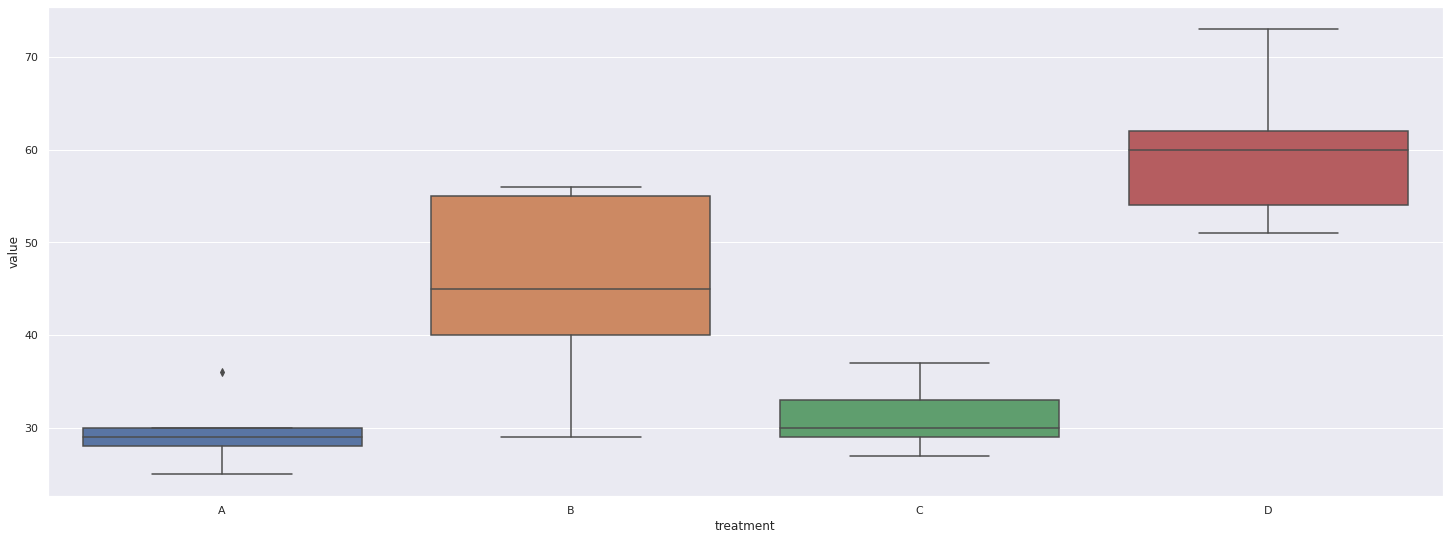

In [37]:
print( pair )

sns.set( rc = {'figure.figsize' : (25,9)} )
sns.boxplot( data = df_melt, x = 'treatment', y = 'value'  );

#### Testes comparativos

In [28]:
### Mesmo com as suposições paramétricas não atendidas, aplicarei o One-way-ANOVA
stats, pvalue = f_oneway( df['A'], df['B'], df['C'], df['D'], )

if pvalue < alpha:
    print( f'Hipótese nula REJEITADA. P-valor: {pvalue:.5}' )
else:
    print( f'FALHA em rejeitar hipótese nula. P-valor: {pvalue:.5}' )   

Hipótese nula REJEITADA. P-valor: 2.6392e-05
